In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from os import listdir, makedirs
import os

import glob

from keras import layers
from keras import models
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras import optimizers, regularizers

Using TensorFlow backend.


In [2]:
resolution = 150
batch_size = 128
learning_rate = [0.001,0.01,0.1]
epochs = [10,50,100]
history_set = {}

### CNN

In [3]:
def plotar(history,epochs,eta,p):
    print('Epochs: {} | Learning rate: {} | p: {}'.format(epochs,eta,p))
    
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend(loc='best')

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc='best')
    plt.show()

In [4]:
def create_model(train_gen, val_gen, learning_rate, num_epochs, batch_size):
    model = Sequential()
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5), strides=(1,1), input_shape=(resolution,resolution,3)))
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(units= 64, activation='relu'))
    model.add(layers.Dense(units=11, activation='relu'))
    
    model.summary()
    
    n_train = train_gen.n
    n_valid = val_gen.n
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adamax(lr=learning_rate), metrics=['acc'])
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=n_train//batch_size,
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=n_valid//batch_size
    )
    
    history_set[(num_epochs,learning_rate)] = history

### Item c)
A técnica que pode ser utilizada é a de Data Augmentation, onde...

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

In [6]:
train_generator = train_datagen.flow_from_directory(
        "../input/top11/top11/",
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        "../input/top11/top11/",
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="validation")

Found 12963 images belonging to 11 classes.
Found 2280 images belonging to 11 classes.


In [7]:
eta = 0.001
epo = 50

In [8]:
print('Learning rate: {} and Num epochs: {}'.format(eta,epo))
create_model(train_generator,val_generator,eta,epo,batch_size)

Learning rate: 0.001 and Num epochs: 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_2 (Dense)              (None, 11)                715       
Total params: 32,520,879
Trainable params: 32,520,879
Non-trainable params: 0
________________________

Epochs: 50 | Learning rate: 0.001 | p: -1.0


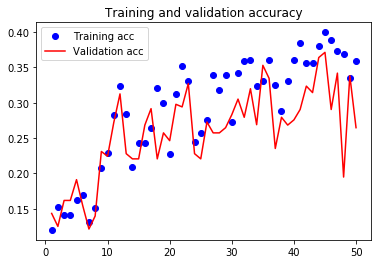

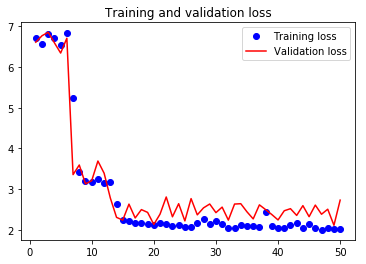

In [9]:
plotar(history_set[(50, 0.001)],50,0.001,-1.0)

### Item d)

In [10]:
p = [0.1,0.3,0.5]
history_p = {}

In [11]:
top10 = {'homer_simpson': 0,
'ned_flanders': 1,
'moe_szyslak': 2,
'lisa_simpson': 3,
'bart_simpson': 4,
'marge_simpson': 5,
'krusty_the_clown': 6,
'principal_skinner': 7,
'charles_montgomery_burns': 8,
'milhouse_van_houten': 9}

In [12]:
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)

train_generator = train_datagen.flow_from_directory(
        "../input/top11/top11/",
        classes = top10,
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="training")

val_generator = val_datagen.flow_from_directory(
        "../input/top11/top11/",
        classes = top10,
        target_size=(resolution, resolution),
        batch_size=16,
        class_mode='categorical', subset="validation")

Found 11745 images belonging to 10 classes.
Found 2066 images belonging to 10 classes.


In [13]:
def create_model(train_gen, val_gen, learning_rate, num_epochs, batch_size, p):
    model = Sequential()
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5), strides=(1,1), input_shape=(resolution,resolution,3)))
    model.add(layers.Conv2D(filters=100, kernel_size=(5,5)))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Flatten())
    model.add(Dropout(p))
    model.add(layers.Dense(units= 64, activation='relu'))
    model.add(layers.Dense(units=10, activation='relu'))
    
    model.summary()
    
    n_train = train_gen.n
    n_valid = val_gen.n
    
    model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adamax(lr=learning_rate), metrics=['acc'])
    history = model.fit_generator(
        train_generator,
        steps_per_epoch=n_train//batch_size,
        epochs=num_epochs,
        validation_data=val_generator,
        validation_steps=n_valid//batch_size
    )
    
    history_set[(num_epochs,learning_rate,p)] = history

In [14]:
for i in p:
    print('Learning rate: {}, num epochs: {} and p: {}'.format(eta,epo,i))
    create_model(train_generator,val_generator,eta,epo,batch_size,i)

Learning rate: 0.001, num epochs: 50 and p: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 146, 146, 100)     7600      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 142, 142, 100)     250100    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 71, 71, 100)       0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 504100)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 504100)            0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                32262464  
_________________________________________________________________
dense_4 (Dense)             

Epoch 1/50
91/91 [==============================] - 22s 244ms/step - loss: 6.8734 - acc: 0.1168 - val_loss: 6.4428 - val_acc: 0.1289
Epoch 2/50
91/91 [==============================] - 19s 212ms/step - loss: 7.0795 - acc: 0.1449 - val_loss: 7.2144 - val_acc: 0.1484
Epoch 3/50
91/91 [==============================] - 19s 211ms/step - loss: 7.2853 - acc: 0.1648 - val_loss: 7.4247 - val_acc: 0.1484
Epoch 4/50
91/91 [==============================] - 19s 211ms/step - loss: 7.2644 - acc: 0.1545 - val_loss: 6.2335 - val_acc: 0.1797
Epoch 5/50
91/91 [==============================] - 19s 211ms/step - loss: 6.7765 - acc: 0.1648 - val_loss: 7.1050 - val_acc: 0.1875
Epoch 6/50
91/91 [==============================] - 19s 211ms/step - loss: 7.0864 - acc: 0.1683 - val_loss: 6.8344 - val_acc: 0.1797
Epoch 7/50
91/91 [==============================] - 19s 209ms/step - loss: 6.6808 - acc: 0.1757 - val_loss: 7.7706 - val_acc: 0.1529
Epoch 8/50
91/91 [==============================] - 19s 211ms/step - 

91/91 [==============================] - 19s 212ms/step - loss: 5.5592 - acc: 0.1813 - val_loss: 5.8018 - val_acc: 0.1992
Epoch 3/50
91/91 [==============================] - 19s 213ms/step - loss: 4.1010 - acc: 0.1909 - val_loss: 3.3941 - val_acc: 0.1406
Epoch 4/50
91/91 [==============================] - 19s 213ms/step - loss: 3.2537 - acc: 0.1992 - val_loss: 2.8654 - val_acc: 0.2383
Epoch 5/50
91/91 [==============================] - 19s 211ms/step - loss: 3.2619 - acc: 0.2561 - val_loss: 3.3143 - val_acc: 0.2603
Epoch 6/50
91/91 [==============================] - 19s 213ms/step - loss: 3.2397 - acc: 0.3290 - val_loss: 3.8932 - val_acc: 0.2266
Epoch 7/50
91/91 [==============================] - 19s 214ms/step - loss: 3.3171 - acc: 0.2603 - val_loss: 3.3574 - val_acc: 0.1992
Epoch 8/50
91/91 [==============================] - 19s 213ms/step - loss: 3.4198 - acc: 0.2692 - val_loss: 3.1613 - val_acc: 0.3008
Epoch 9/50
91/91 [==============================] - 19s 213ms/step - loss: 3.243

Epochs: 50 | Learning rate: 0.001 | p: 0.1


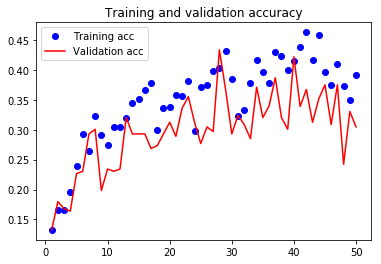

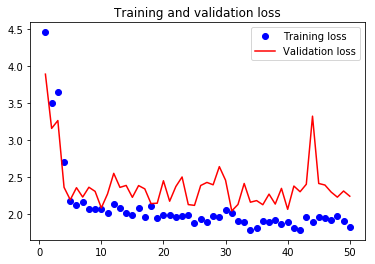

Epochs: 50 | Learning rate: 0.001 | p: 0.3


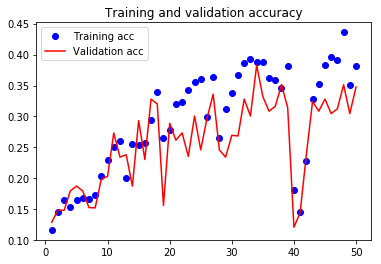

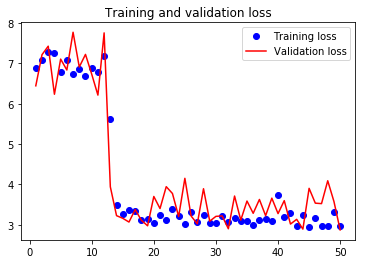

Epochs: 50 | Learning rate: 0.001 | p: 0.5


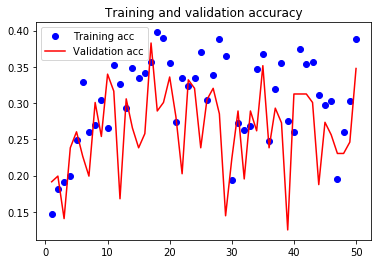

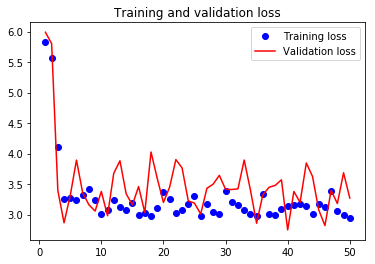

In [15]:
for i in p:
    plotar(history_set[(50, 0.001,i)],50,0.001,i)